# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [3]:
model= np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [4]:
predict = np.poly1d(model)
predict(65)

68.63013698630135

In [5]:
y_pred= predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

## Importing the dataset

In [6]:
dataset = pd.read_csv('data4.csv')
dataset


,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [7]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train = X_train.reshape(-1, 1)
X_test =  X_test.reshape(-1, 1)
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test.reshape(-1, 1))

## Visualising the Training set results

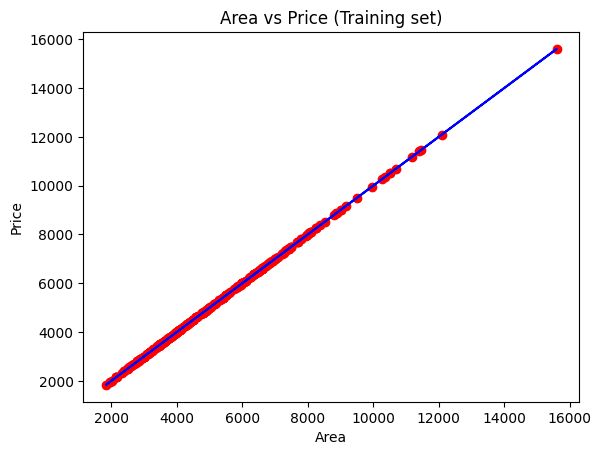

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Area vs Price (Training set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Visualising the Test set results

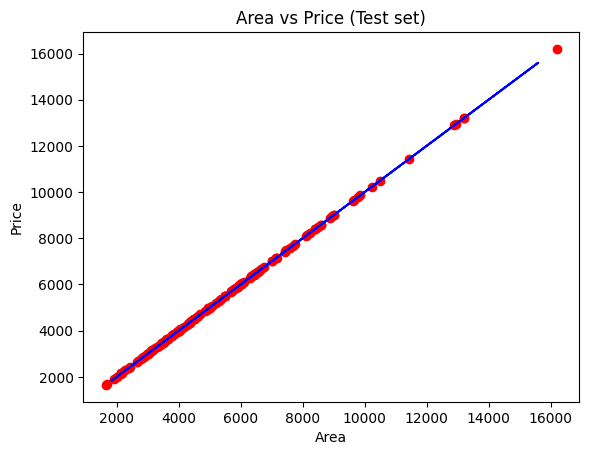

In [12]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Area vs Price (Test set)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Making a single prediction (for example find the area of a house with 14000000 price)

In [13]:
print(regressor.predict([[14000000]]))

[14000000.]


Therefore, our model predicts that the area of a house with 14000000 price is $ 10039.32 sq m

**Important note:** Notice that the value of the feature (14000000 price) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 13300000 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$14000000 \rightarrow \textrm{scalar}$

$[14000000] \rightarrow \textrm{1D array}$

$[[14000000]] \rightarrow \textrm{2D array}$

## Getting the final linear regression equation with the values of the coefficients

In [14]:
print(regressor.coef_)
print(regressor.intercept_)

[1.]
0.0


Therefore, the equation of our simple linear regression model is:

$$\textrm{Area} = 0.00053871 \times \textrm{Price} + 2497.41$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.